# Problem Statements

### 1. Collect data from sqlite

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sqlite3

In [3]:
con = sqlite3.connect("zomato_rawdata.sqlite")


In [4]:
df = pd.read_sql_query('SELECT * FROM USERS' , con)

In [5]:
df.shape

(51717, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   index                        51717 non-null  int64 
 1   url                          51717 non-null  object
 2   address                      51717 non-null  object
 3   name                         51717 non-null  object
 4   online_order                 51717 non-null  object
 5   book_table                   51717 non-null  object
 6   rate                         43942 non-null  object
 7   votes                        51717 non-null  int64 
 8   phone                        50509 non-null  object
 9   location                     51696 non-null  object
 10  rest_type                    51490 non-null  object
 11  dish_liked                   23639 non-null  object
 12  cuisines                     51672 non-null  object
 13  approx_cost(for two people)  51

### 2.Data Cleaning 

In [7]:
df.isnull().sum()# important columns have many missing values 

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [8]:
df.dtypes

index                           int64
url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [9]:
df["approx_cost(for two people)"].unique()#we have to convert them into numerical values and relace , as thousands mark

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', None, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [10]:
df["approx_cost(for two people)"]=df["approx_cost(for two people)"].str.replace(',',"")

In [11]:
df["approx_cost(for two people)"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', None, '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [12]:
df["approx_cost(for two people)"]=df["approx_cost(for two people)"].astype(float)

In [13]:
df["approx_cost(for two people)"].dtype

dtype('float64')

In [14]:
df["approx_cost(for two people)"].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [15]:
#lets work on rate

df['rate'].unique() #we need to remove these decimal 

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [16]:
df['rate']=df['rate'].str.replace('/5','')
# we further find that there are none , new ,- as well we have to convert them to string first
df['rate']

0         4.1
1         4.1
2         3.8
3         3.7
4         3.8
         ... 
51712    3.6 
51713    None
51714    None
51715    4.3 
51716    3.4 
Name: rate, Length: 51717, dtype: object

In [17]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       None, '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4',
       '2.2', '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ',
       '4.1 ', '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ',
       '2.5 ', '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1',
       '2.0', '1.8', '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ',
       '2.4 ', '2.1 ', '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [18]:
df['rate'] = df['rate'].astype(str)

In [19]:
df['rate'].replace('NEW' , np.nan , inplace=True)
df['rate'].replace('None' , np.nan , inplace=True)
df['rate'].replace('-' , np.nan , inplace=True)

In [20]:
df['rate'].isnull().sum()

10052

In [21]:
df['rate']=df['rate'].astype(float)


### 3.Data Analysis for most famous dishes of most famous restaurant.

In [22]:
# those restaurants who delivered the most are most famous reastaurants.

In [23]:
df['rest_type'].value_counts()

rest_type
Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: count, Length: 93, dtype: int64

In [24]:
df['rest_type'].isnull().sum()

227

In [25]:
df.shape

(51717, 18)

In [26]:
data=df.dropna(subset=['rest_type'])
data.shape

(51490, 18)

In [27]:
data_qk=data[data['rest_type'].str.contains('Quick Bites')]
data_qk

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
23,23,https://www.zomato.com/bangalore/my-tea-house-...,"224/Y, 4th Phase, 7th Block, 100 Feet Ring Roa...",My Tea House,Yes,No,3.6,62,080 65975430\r\n+91 7337733798,Banashankari,"Quick Bites, Cafe","Pasta, Iced Tea","Italian, Fast Food, Cafe, European",600.0,"[('Rated 4.0', ""RATED\n So, went here with fr...",[],Cafes,Banashankari
26,26,https://www.zomato.com/bangalore/coffee-tindi-...,"27th Cross Rd, Banashankari Stage II, Banashan...",Coffee Tindi,Yes,No,3.8,75,+91 9945758046,Banashankari,"Cafe, Quick Bites",None,"Cafe, South Indian",200.0,"[('Rated 5.0', 'RATED\n please provide some e...",[],Cafes,Banashankari
31,31,https://www.zomato.com/bangalore/foodiction-1-...,"2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...",Foodiction,Yes,No,2.8,506,+91 9916107070,Banashankari,Quick Bites,"Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...","North Indian, Fast Food, Chinese, Burger",500.0,"[('Rated 1.0', ""RATED\n Worst restaurant ever...",[],Delivery,Banashankari
34,34,https://www.zomato.com/bangalore/faasos-banash...,"80, BDA Complex, 2nd Stage, Banashankari, Bang...",Faasos,Yes,No,4.2,415,+91 7700020020,Banashankari,Quick Bites,"Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...","North Indian, Biryani, Fast Food",500.0,"[('Rated 3.0', 'RATED\n Not worth for the mon...","['Chole Kulcha Meal', 'Upvas Aloo Paratha With...",Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51641,51641,https://www.zomato.com/bangalore/andhra-spices...,"188, ITPL Main Road, Brookefields, Bangalore, ...",Andhra Spices,No,No,3.2,4,None,Brookefield,Quick Bites,None,"Andhra, Chinese, South Indian",NaN,"[('Rated 2.0', ""RATED\n Food is not upto the ...",[],Dine-out,Whitefield
51642,51642,https://www.zomato.com/bangalore/basaveshwara-...,"Nanjudeshwari complex, Oppsite Brookefield Mal...",Basaveshwara Khanavali,No,No,NaN,0,+91 9740912864\n+91 7353747430,Brookefield,Quick Bites,None,South Indian,200.0,[],[],Dine-out,Whitefield
51643,51643,https://www.zomato.com/bangalore/new-ambur-bir...,"AECS Layout, ITPL Main Road, Brookefield, Bang...",New Ambur Biryani,No,No,NaN,0,+91 9443087893,Brookefield,Quick Bites,None,"Biryani, Kebab",300.0,[],[],Dine-out,Whitefield
51644,51644,https://www.zomato.com/bangalore/punjabi-thadk...,"7/3, ASK Tower, Kundanahalli Gate, Next to Bat...",Punjabi Thadka,No,No,NaN,0,+91 7338330336\n+91 9591568221,Brookefield,Quick Bites,None,North Indian,400.0,[],[],Dine-out,Whitefield


In [28]:
data_qk['dish_liked'].str.lower() # making all of them in lower case 

3                                              masala dosa
23                                         pasta, iced tea
26                                                    None
31       burgers, lassi, chicken grill, naan, momos, ch...
34       rolls, veggie wrap, chocolate fantasy, rice bo...
                               ...                        
51641                                                 None
51642                                                 None
51643                                                 None
51644                                                 None
51645                                              burgers
Name: dish_liked, Length: 20639, dtype: object

In [29]:
all_dishes = data_qk['dish_liked'].str.lower().str.cat() # concate all dishes in string format for wordcloud 
all_dishes

'masala dosapasta, iced teaburgers, lassi, chicken grill, naan, momos, chicken burger, biryanirolls, veggie wrap, chocolate fantasy, rice bowls, chicken rice, paneer makhanwala, chicken tikka wrapdabeli, faluda, masala poori, sandwiches, tokri chaat, pav bhaji, dahipuriburgers, fries, hot chocolatepane pizza, lava cake, pasta, stuffed garlic bread, chocolava cake, tacosbiryaniparatha, pastapasta, momos, rolls, chicken roll, chilli chicken, paneer roll, spaghettigrape juice, chicken grill, chicken tikka roll, shawarma roll, chicken shawarama, biryani combo, rollsvegetable biryani, ginger chicken, chicken biryani, donne biryani, chicken kebab, egg bhurji, dum biryanirolls, momos, fries, veggie roll, chicken kebab roll, paneer roll, cheese rollbenne dosa, mirchi bajji, filter coffee, poha, tea, butter dosa, crispy dosamasala dosapanipuri, chaat, noodles, dahi bhallerooftop ambiencecoffee, tea, kesari bath, open dosa, vada, idli, bread dosamasala dosa, tirupathi pongal, filter coffee, vada

In [30]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   -- ------------------------------------- 10.2/151.4 kB ? eta -:--:--
   -- ------------------------------------- 10.2/151.4 kB ? eta -:--:--
   ------- ------------------------------- 30.7/151.4 kB 262.6 kB/s eta 0:00:01
   ------------------ -------------------- 71.7/151.4 kB 393.8 kB/s eta 0:00:01
   ------------------ -------------------- 71.7/151.4 kB 393.8 kB/s eta 0:00:01
   ------------------ -------------------- 71.7/151.4 kB 393.8 kB/s eta 0:00:01
   ------------------ -------------------- 71.7/151.4 kB 393.8 kB/s eta 0:00:01
   ------------------ -------------------- 71.7/151.4 kB 393.8 kB/s eta 0:00:01
   ------------------ -------------------- 71.7/151.4 kB 393.8 kB/s eta 0:00:01
   ----------

In [31]:
import wordcloud

In [32]:
from wordcloud import WordCloud

(-0.5, 399.5, 199.5, -0.5)

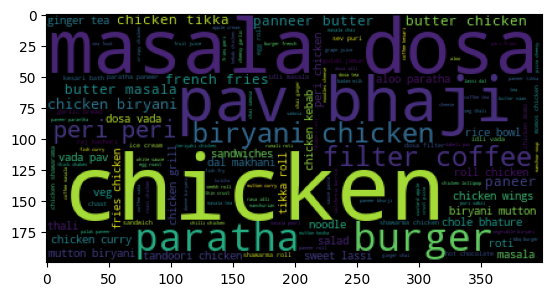

In [33]:
wordcloud = WordCloud().generate(all_dishes)
plt.imshow(wordcloud)
plt.axis('on')

### lets work on missing value

In [34]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [35]:
df[['rate','reviews_list']]

,rate,reviews_list
0,4.1,"[('Rated 4.0', 'RATED\n A beautiful place to ..."
1,4.1,"[('Rated 4.0', 'RATED\n Had been here for din..."
2,3.8,"[('Rated 3.0', ""RATED\n Ambience is not that ..."
3,3.7,"[('Rated 4.0', ""RATED\n Great food and proper..."
4,3.8,"[('Rated 4.0', 'RATED\n Very good restaurant ..."
...,...,...
51712,3.6,"[('Rated 5.0', ""RATED\n Food and service are ..."
51713,NaN,[]
51714,NaN,[]
51715,4.3,"[('Rated 4.0', 'RATED\n Nice and friendly pla..."


In [36]:
df[df['rate'].isnull()].index## rows in which 'rate' have missing value ..

Index([   72,    75,    84,    90,    91,    92,   107,   110,   113,   114,
       ...
       51636, 51638, 51639, 51642, 51643, 51644, 51675, 51710, 51713, 51714],
      dtype='int64', length=10052)

In [37]:
df['rate'][72]

nan

In [38]:
type(df['reviews_list'][72])

str

In [39]:
import ast ## inbuilt module ast (abstract syntax trees)

In [40]:
ast.literal_eval(df['reviews_list'][72])# return "a list of tuples"

[('Rated 4.0',
  'RATED\n  cost for chicken rolls is very high but fine taste by pandey and is crew. pls deduct the cost of rolls and great variety of food is been served'),
 ('Rated 5.0',
  'RATED\n  Awesome taste, feel rich taste of food, cleanness is very good, very friendly nature by the hotel person, totally awesome, all the best gud luck')]

In [41]:
first_input = ast.literal_eval(df['reviews_list'][72])[0]
first_input

('Rated 4.0',
 'RATED\n  cost for chicken rolls is very high but fine taste by pandey and is crew. pls deduct the cost of rolls and great variety of food is been served')

In [42]:
type([i.replace('Rated','').strip() for i in first_input][0])

str

In [43]:
float([i.replace('Rated','').strip() for i in first_input][0])## convert string value into float..

4.0

In [44]:
### let's make function so that we are able to apply this function on "reviews_list" to extract "rating" as much as we can !

def get_rate(x):
    list_of_reviews = ast.literal_eval(x)
    
    if list_of_reviews is None or len(list_of_reviews)<=1:
        return None
    else:
        first_input = list_of_reviews[0]
        rate = float([i.replace('Rated','').strip() for i in first_input][0])
        return rate

In [45]:
df['rate_from_reviews_list']=df['reviews_list'].apply(get_rate)

In [46]:
df['rate'][72] = df['rate_from_reviews_list'][72] ## lets fill "nan" with 4.0

C:\Users\User\AppData\Local\Temp\ipykernel_42488\3626387152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rate'][72] = df['rate_from_reviews_list'][72] ## lets fill "nan" with 4.0


In [47]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [48]:
nan_index = df[df['rate'].isnull()].index

In [49]:
for index in nan_index:
    df['rate'][index] = df['rate_from_reviews_list'][index]

In [50]:
df['rate'].isnull().sum()

8542

In [51]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            8542
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
rate_from_reviews_list         16120
dtype: int64

In [52]:
dataframe = df.drop(['dish_liked' , 'rate_from_reviews_list'] , axis=1)# since more than 50%

In [53]:
dataframe.head(3)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


## let's do feature engineering

### Feature EXtraction

In [54]:
dataframe.head(3)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [55]:
type(dataframe['cuisines'][0])

str

In [56]:
dataframe['cuisines'][0].split(',')# now it becomes a list

['North Indian', ' Mughlai', ' Chinese']

In [57]:
len(dataframe['cuisines'][0].split(','))

3

In [58]:
# creating a function 
def count(row):
    return len(row.split(','))

In [59]:
dataframe['total_cuisines'] = dataframe['cuisines'].astype(str).apply(count)
dataframe['multiple_resto'] = dataframe['rest_type'].astype(str).apply(count)

In [60]:
dataframe.head(3)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),total_cuisines,multiple_resto
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,3,1
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,3,1
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3,2


## let's  see important features

In [61]:
#making a target feature
threshold=3.80
dataframe['target'] = dataframe['rate'].apply(lambda x: 1 if x>=threshold else 0)

In [62]:
dataframe.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'total_cuisines',
       'multiple_resto', 'target'],
      dtype='object')

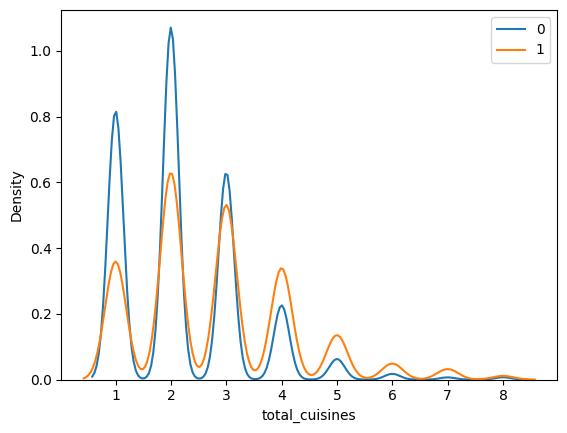

In [63]:
sns.distplot(dataframe[dataframe['target']==0]['total_cuisines'],hist=False,label=0)
sns.distplot(dataframe[dataframe['target']==1]['total_cuisines'],hist = False,label=1)
plt.legend()

In [64]:
## we find that featuture total_cuisines is not important since it does not influence the rating or sucess of the restaurant.

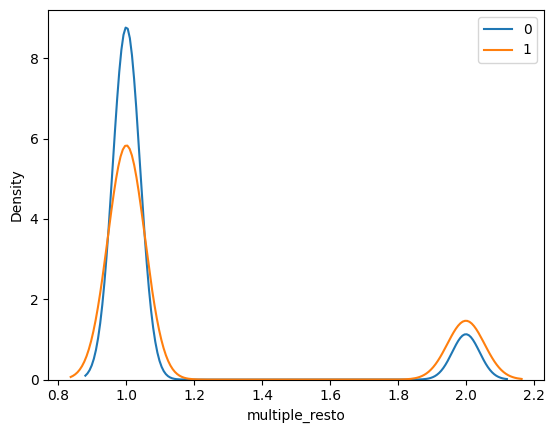

In [65]:
sns.distplot(dataframe[dataframe['target']==0]['multiple_resto'],hist=False,label=0)
sns.distplot(dataframe[dataframe['target']==1]['multiple_resto'],hist = False,label=1)
plt.legend()

In [66]:
## it is also not a important feature 

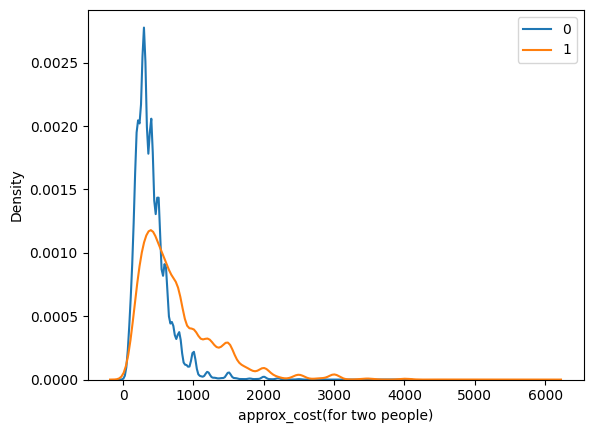

In [67]:
sns.distplot(dataframe[dataframe['target']==0]['approx_cost(for two people)'],hist=False,label=0)
sns.distplot(dataframe[dataframe['target']==1]['approx_cost(for two people)'],hist = False,label=1)
plt.legend()

In [68]:
## above feature is havinga partial overlap hence is a contributing feeaeture

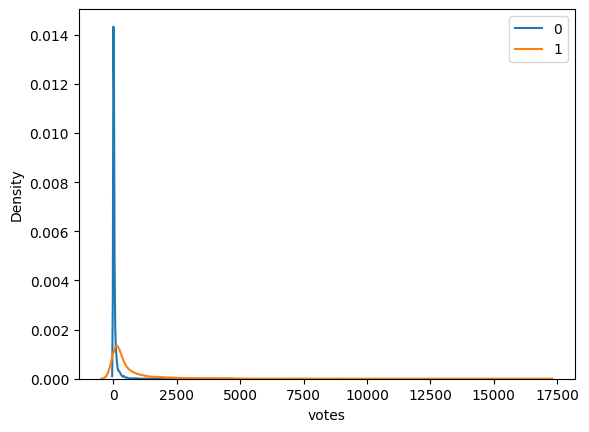

In [69]:
sns.distplot(dataframe[dataframe['target']==0]['votes'],hist=False,label=0)
sns.distplot(dataframe[dataframe['target']==1]['votes'],hist = False,label=1)
plt.legend()## this feature is important for prediction of sucess or failure of restaurant

In [70]:
#now lets drop not so important features for our machine learning 

In [71]:
dataframe.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'total_cuisines',
       'multiple_resto', 'target'],
      dtype='object')

In [72]:
data=dataframe.dropna()

In [73]:
data.shape

(42144, 20)

In [74]:
important_features = ['online_order', 'book_table', 
       'votes',  'location', 'rest_type',
       'approx_cost(for two people)', 'reviews_list',
       'listed_in(type)', 'listed_in(city)', 'target']

In [75]:
data = dataframe[important_features]## our important feature list and new data

In [76]:
data.shape

(51717, 10)

In [77]:
 categorical_features = [col for col in data.columns if data[col].dtype=='O']
categorical_features

['online_order',
 'book_table',
 'location',
 'rest_type',
 'reviews_list',
 'listed_in(type)',
 'listed_in(city)']

In [78]:
numerical_feature = [col for col in data.columns if data[col].dtype!='O']

In [79]:
for feature in categorical_features:
    print('{} has total {} unique features'.format(feature,data[feature].nunique()))

online_order has total 2 unique features
book_table has total 2 unique features
location has total 93 unique features
rest_type has total 93 unique features


reviews_list has total 22513 unique features
listed_in(type) has total 7 unique features
listed_in(city) has total 30 unique features


In [80]:
fre_data = data['rest_type'].value_counts()[0:6]/len(data)*100 ## giving % of top
fre_data.index

Index(['Quick Bites', 'Casual Dining', 'Cafe', 'Delivery', 'Dessert Parlor',
       'Takeaway, Delivery'],
      dtype='object', name='rest_type')

In [81]:
data[data['rest_type'].isin(fre_data.index)]

,online_order,book_table,votes,location,rest_type,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),target
0,Yes,Yes,775,Banashankari,Casual Dining,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,1
1,Yes,No,787,Banashankari,Casual Dining,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,1
3,No,No,88,Banashankari,Quick Bites,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,0
4,No,No,166,Basavanagudi,Casual Dining,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,1
5,Yes,No,286,Basavanagudi,Casual Dining,600.0,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",Buffet,Banashankari,1
...,...,...,...,...,...,...,...,...,...,...
51641,No,No,4,Brookefield,Quick Bites,NaN,"[('Rated 2.0', ""RATED\n Food is not upto the ...",Dine-out,Whitefield,0
51642,No,No,0,Brookefield,Quick Bites,200.0,[],Dine-out,Whitefield,0
51643,No,No,0,Brookefield,Quick Bites,300.0,[],Dine-out,Whitefield,0
51644,No,No,0,Brookefield,Quick Bites,400.0,[],Dine-out,Whitefield,0


In [82]:
data['rest_type'] = data['rest_type'].apply(lambda x:'other' if x not in fre_data.index else x)

In [83]:
categorical_features

['online_order',
 'book_table',
 'location',
 'rest_type',
 'reviews_list',
 'listed_in(type)',
 'listed_in(city)']

In [84]:
data['listed_in(city)'].value_counts()/len(data)*100 ## here top 5 doed not contributes to 70-90% of the data.so not good for ohe.

listed_in(city)
BTM                      6.340275
Koramangala 7th Block    5.680917
Koramangala 5th Block    5.483690
Koramangala 4th Block    5.373475
Koramangala 6th Block    5.071833
Jayanagar                4.584566
JP Nagar                 4.052826
Indiranagar              3.596496
Church Street            3.532688
MG Road                  3.501750
Brigade Road             3.420539
Lavelle Road             3.372199
HSR                      3.366398
Marathahalli             3.207843
Residency Road           3.132432
Whitefield               3.132432
Bannerghatta Road        3.126631
Brookefield              2.935205
Old Airport Road         2.755380
Kammanahalli             2.569755
Kalyan Nagar             2.531083
Basavanagudi             2.447938
Sarjapur Road            2.438270
Electronic City          2.376395
Bellandur                2.372527
Frazer Town              2.291316
Malleshwaram             2.119226
Rajajinagar              2.086355
Banashankari             1.66869

In [85]:
data['listed_in(type)'].value_counts()/len(data)*100 ##will use ohe since top 5 contriction ie good amount

listed_in(type)
Delivery              50.161456
Dine-out              34.377477
Desserts               6.947425
Cafes                  3.331593
Drinks & nightlife     2.128894
Buffet                 1.705435
Pubs and bars          1.347719
Name: count, dtype: float64

In [86]:
data['location'].value_counts()/len(data)*100### not important to use ohe

location
BTM                      9.907767
HSR                      4.878473
Koramangala 5th Block    4.841735
JP Nagar                 4.321596
Whitefield               4.145639
                           ...   
West Bangalore           0.011602
Yelahanka                0.011602
Jakkur                   0.005801
Rajarajeshwari Nagar     0.003867
Peenya                   0.001934
Name: count, Length: 93, dtype: float64

In [87]:
categorical_features

['online_order',
 'book_table',
 'location',
 'rest_type',
 'reviews_list',
 'listed_in(type)',
 'listed_in(city)']

In [88]:
##thus overall in book 'online_order', 'book_table','rest_type','listed_in(type)' we are going to use OHE.here all categorical columns are
# and these all are nominal so insteaed of coloumn transformer we will use fuction


In [89]:
pd.get_dummies(data['online_order'],prefix='online_order',drop_first=True)

,online_order_Yes
0,True
1,True
2,True
3,False
4,False
...,...
51712,False
51713,False
51714,False
51715,False


In [90]:
for col in ['online_order', 'book_table','rest_type','listed_in(type)']:
     col_encoded = pd.get_dummies(data[col],prefix=col,drop_first=True)
     data = pd.concat([data,col_encoded],axis=1)
    

In [91]:
data.head(3)

,online_order,book_table,votes,location,rest_type,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),target,...,rest_type_Dessert Parlor,rest_type_Quick Bites,"rest_type_Takeaway, Delivery",rest_type_other,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,Yes,Yes,775,Banashankari,Casual Dining,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,1,...,False,False,False,False,False,False,False,False,False,False
1,Yes,No,787,Banashankari,Casual Dining,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,1,...,False,False,False,False,False,False,False,False,False,False
2,Yes,No,918,Banashankari,other,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,1,...,False,False,False,True,False,False,False,False,False,False


In [92]:
data.groupby(['location'])['target'].mean()

location
BTM                  0.269906
Banashankari         0.402870
Banaswadi            0.189759
Bannerghatta Road    0.241104
Basavanagudi         0.459064
                       ...   
West Bangalore       0.166667
Whitefield           0.312500
Wilson Garden        0.223577
Yelahanka            0.333333
Yeshwantpur          0.210084
Name: target, Length: 93, dtype: float64

In [93]:
dict_mean_location  = data.groupby(['location'])['target'].mean().to_dict()
dict_mean_location

{'BTM': 0.26990632318501173,
 'Banashankari': 0.40286975717439294,
 'Banaswadi': 0.1897590361445783,
 'Bannerghatta Road': 0.2411042944785276,
 'Basavanagudi': 0.4590643274853801,
 'Basaveshwara Nagar': 0.31413612565445026,
 'Bellandur': 0.276049766718507,
 'Bommanahalli': 0.046218487394957986,
 'Brigade Road': 0.4671592775041051,
 'Brookefield': 0.3404255319148936,
 'CV Raman Nagar': 0.08888888888888889,
 'Central Bangalore': 0.0,
 'Church Street': 0.7785588752196837,
 'City Market': 0.16666666666666666,
 'Commercial Street': 0.35945945945945945,
 'Cunningham Road': 0.6741344195519349,
 'Domlur': 0.3165322580645161,
 'East Bangalore': 0.11363636363636363,
 'Ejipura': 0.07972665148063782,
 'Electronic City': 0.18600953895071543,
 'Frazer Town': 0.3246217331499312,
 'HBR Layout': 0.39215686274509803,
 'HSR': 0.40388426476416966,
 'Hebbal': 0.2857142857142857,
 'Hennur': 0.13664596273291926,
 'Hosur Road': 0.3627450980392157,
 'ITPL Main Road, Whitefield': 0.26548672566371684,
 'Indirana

In [94]:
data['location'] = data['location'].map(dict_mean_location) ## lets map "dict_mean_location" on top of "location" feature

In [95]:
data['location']

0        0.402870
1        0.402870
2        0.402870
3        0.402870
4        0.459064
           ...   
51712    0.312500
51713    0.312500
51714    0.312500
51715    0.265487
51716    0.265487
Name: location, Length: 51717, dtype: float64

In [96]:
data.head(3)

,online_order,book_table,votes,location,rest_type,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),target,...,rest_type_Dessert Parlor,rest_type_Quick Bites,"rest_type_Takeaway, Delivery",rest_type_other,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,Yes,Yes,775,0.40287,Casual Dining,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,1,...,False,False,False,False,False,False,False,False,False,False
1,Yes,No,787,0.40287,Casual Dining,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,1,...,False,False,False,False,False,False,False,False,False,False
2,Yes,No,918,0.40287,other,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,1,...,False,False,False,True,False,False,False,False,False,False


In [97]:
data.columns

Index(['online_order', 'book_table', 'votes', 'location', 'rest_type',
       'approx_cost(for two people)', 'reviews_list', 'listed_in(type)',
       'listed_in(city)', 'target', 'online_order_Yes', 'book_table_Yes',
       'rest_type_Casual Dining', 'rest_type_Delivery',
       'rest_type_Dessert Parlor', 'rest_type_Quick Bites',
       'rest_type_Takeaway, Delivery', 'rest_type_other',
       'listed_in(type)_Cafes', 'listed_in(type)_Delivery',
       'listed_in(type)_Desserts', 'listed_in(type)_Dine-out',
       'listed_in(type)_Drinks & nightlife', 'listed_in(type)_Pubs and bars'],
      dtype='object')

In [98]:
data.drop(['online_order', 'book_table','rest_type','reviews_list','listed_in(type)','listed_in(city)', 'target'],axis=1,inplace=True)

In [99]:
data.shape

(51717, 17)

In [100]:
data.head(3)## all are numerical columns no ready to feed to Machine Learning.

,votes,location,approx_cost(for two people),online_order_Yes,book_table_Yes,rest_type_Casual Dining,rest_type_Delivery,rest_type_Dessert Parlor,rest_type_Quick Bites,"rest_type_Takeaway, Delivery",rest_type_other,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,775,0.40287,800.0,True,True,True,False,False,False,False,False,False,False,False,False,False,False
1,787,0.40287,800.0,True,False,True,False,False,False,False,False,False,False,False,False,False,False
2,918,0.40287,800.0,True,False,False,False,False,False,False,True,False,False,False,False,False,False
